In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# linkage : 계층형 군집분석
# fclust : linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
# KMeans 군집분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN

In [2]:
data = pd.read_csv('./csvfiles/직무능력평가.csv')

In [3]:
scaler = StandardScaler()
ds_supervisor_scaled = scaler.fit_transform(data)

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
ds_supervisor_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [5]:
y = ds_supervisor_scaled[:,0]
x = ds_supervisor_scaled[:, 1::]


### Dendrogram

Text(0, 0.5, 'sample index')

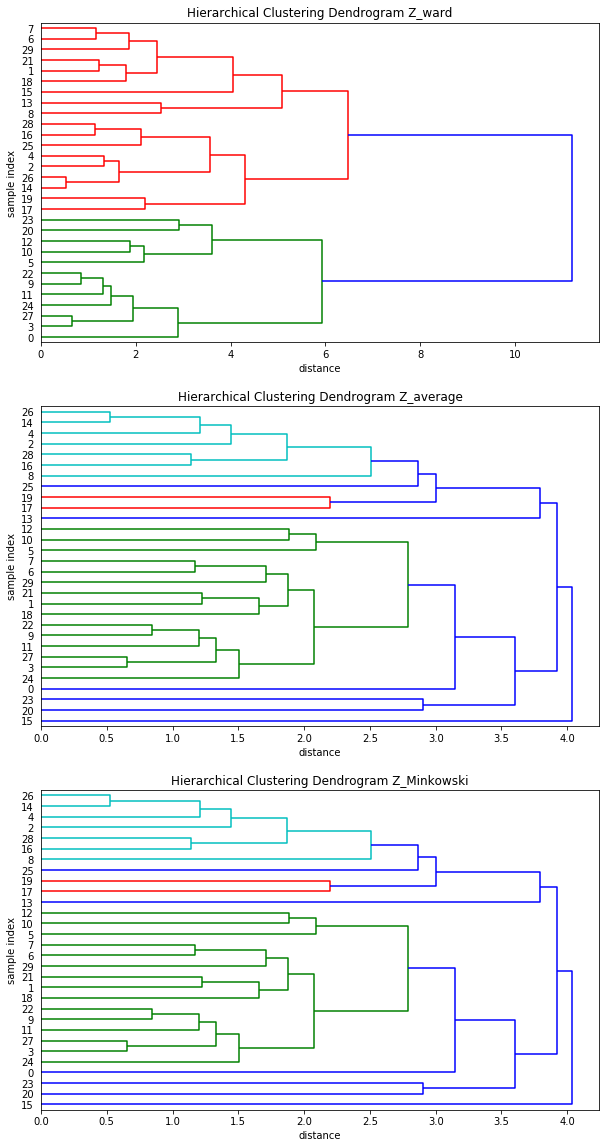

In [9]:
Z_ward = linkage(x, method='ward', metric='euclidean')
Z_average = linkage(x, method='average', metric='euclidean')
Z_Minkowski = linkage(x, method='average', metric='minkowski')

plt.figure(figsize = (10,20))
ax = plt.subplot(311)
dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title("Hierarchical Clustering Dendrogram Z_ward")
plt.xlabel("distance")
plt.ylabel("sample index")
ax = plt.subplot(312)
dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title("Hierarchical Clustering Dendrogram Z_average")
plt.xlabel("distance")
plt.ylabel("sample index")
ax = plt.subplot(313)
dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title("Hierarchical Clustering Dendrogram Z_Minkowski")
plt.xlabel("distance")
plt.ylabel("sample index")
# plt.subplots_adjust(hspace = 0.3)

In [7]:
cluster_hierarchical = fcluster(Z=Z_ward, t=5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
data["ClusterHierarchical"] = cluster_hierarchical

In [8]:
ds_summary_hc = data.groupby("ClusterHierarchical").agg(['min','mean','max'])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns=level0 + "_" + level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [12]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error= pd.DataFrame({"NumberofCluster":cluster_range, "Error":clus_error})
ds_error.head()

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.932631
3,4,80.420445
4,5,69.271289


Text(0, 0.5, 'Sum of squared distance')

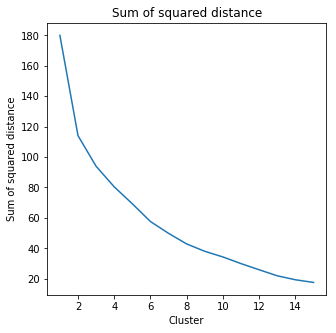

In [14]:
plt.figure(figsize=(5,5))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Cluster")
plt.ylabel("Sum of squared distance")

In [15]:
clus = KMeans(5)
clus.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
cluster_kmeans = [i+1 for i in clus.labels_]
data["ClusterKmeans"] = cluster_kmeans
data.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,4
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,4
4,81,78,56,66,71,83,47,3,3
